In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,NaN,NaN,0.54,0.5,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	148
float64		column 2	148
float64		column 3	296
float64		column 4	185
float64		column 5	74
float64		column 6	0
float64		column 7	259
float64		column 8	74


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1336.000000,1336.000000,1188.000000,1299.000000,1410.000000,1484.000000,1225.000000,1410.000000
mean,0.500097,0.498743,0.500152,0.261894,0.504255,0.007500,0.501363,0.276206
std,0.136239,0.121774,0.083573,0.137903,0.045946,0.075683,0.054383,0.106103
min,0.110000,0.140000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.572500,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,0.970000,1.000000,0.790000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

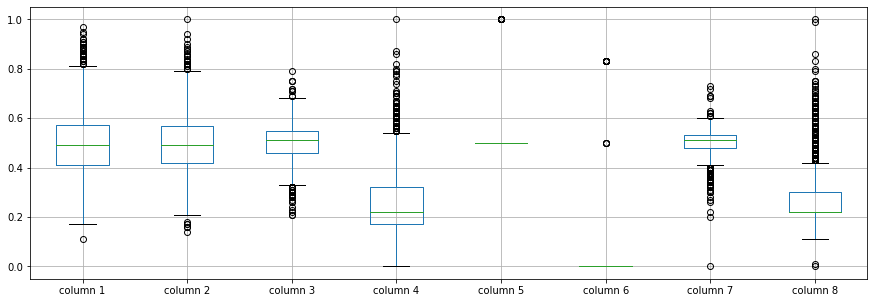

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.500097
column 2    0.498743
column 3    0.500152
column 4    0.261894
column 5    0.504255
column 6    0.007500
column 7    0.501363
column 8    0.276206
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.536145,-0.128082,0.133793,0.038126,0.030421,0.070580,-0.129627
column 2,0.536145,1.000000,-0.239850,0.135378,0.067391,-0.004889,0.066067,-0.096793
column 3,-0.128082,-0.239850,1.000000,0.042673,0.012624,-0.007963,-0.113702,0.000265
column 4,0.133793,0.135378,0.042673,1.000000,-0.006186,-0.008307,-0.080318,-0.042495
column 5,0.038126,0.067391,0.012624,-0.006186,1.000000,-0.008788,0.046122,-0.011610
column 6,0.030421,-0.004889,-0.007963,-0.008307,-0.008788,1.000000,0.006174,-0.036732
column 7,0.070580,0.066067,-0.113702,-0.080318,0.046122,0.006174,1.000000,0.074566
column 8,-0.129627,-0.096793,0.000265,-0.042495,-0.011610,-0.036732,0.074566,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+45,8+45+45,8+45+45+45,8+45+45+45+45,8+45+45+45+45+45,8+45+45+45+45+45+45,8+45+45+45+45+45,8+45+45+45+45,8+45+45+45,8+45+45,8+45,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.59105906797492
Epoch: 1 , loss: 2.1777336947295978
Epoch: 2 , loss: 2.000852299773175
Epoch: 3 , loss: 1.8842899164427882
Epoch: 4 , loss: 1.7566096445788508
Epoch: 5 , loss: 1.685359564812287
Epoch: 6 , loss: 1.6182456508926724
Epoch: 7 , loss: 1.5377219371173694
Epoch: 8 , loss: 1.4612127983051797
Epoch: 9 , loss: 1.4399908599646196
Epoch: 10 , loss: 1.379073678151421
Epoch: 11 , loss: 1.335511820471805
Epoch: 12 , loss: 1.30870602377083
Epoch: 13 , loss: 1.2710896244515544
Epoch: 14 , loss: 1.2308339359967604
Epoch: 15 , loss: 1.2051336298818174
Epoch: 16 , loss: 1.1691182145605916
Epoch: 17 , loss: 1.1715937911168388
Epoch: 18 , loss: 1.1531095064204673
Epoch: 19 , loss: 1.1071105469828066
Epoch: 20 , loss: 1.1094002011029616
Epoch: 21 , loss: 1.0878730260807534
Epoch: 22 , loss: 1.084475084491398
Epoch: 23 , loss: 1.0522793978452682
Epoch: 24 , loss: 1.04348275454148
Epoch: 25 , loss: 1.038273794

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.224041,0.18577,0.0,0.0,0.0,0.185789,0.128582
...,...,...,...,...,...,...,...,...
1479,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000
1480,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000
1481,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000
1482,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.46969217458056, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.11661426344074448

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.610000,0.47000,0.13,0.5,0.0,0.480000,0.220000
1,0.43,0.670000,0.48000,0.27,0.5,0.0,0.530000,0.220000
2,0.64,0.620000,0.49000,0.15,0.5,0.0,0.530000,0.220000
3,0.58,0.440000,0.57000,0.13,0.5,0.0,0.540000,0.220000
4,0.42,0.664041,0.66577,0.54,0.5,0.0,0.665789,0.348582
...,...,...,...,...,...,...,...,...
1479,0.82,0.630000,0.47000,0.18,0.5,0.0,0.500000,0.220000
1480,0.35,0.290000,0.46000,0.14,0.5,0.0,0.540000,0.660000
1481,0.41,0.470000,0.50000,0.14,0.5,0.0,0.530000,0.370000
1482,0.51,0.450000,0.62000,0.25,0.5,0.0,0.590000,0.220000


In [20]:
imputations[-1].to_excel("Yeast_AL_10(imp).xlsx", index=False, header=False)